In [5]:
import time
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import AutoMinorLocator
import re
import copy

def extractDirection(df):
    if 'N' in df:
        return 'North'
    if 'S' in df:
        return 'South'
    if 'E' in df:
        return 'East'

def extractDistance(df):
    t = re.findall(r'(\d+)', df)
    return t[0]

import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [6]:
data_defense = pd.read_csv('/Users/hkromer/02_PhD/04_Publiations/08.Defense/Figures/bonner_sphere_mapping.data', index_col=0)
data_defense

,NP1_north,NP1_south,NP1_east,NP2_north,NP2_south,NP2_east,dist_north,dist_south,dist_east
0,2.857269e+07,2.751103e+07,2.893334e+07,2.572285e+07,3.146750e+07,2.533143e+07,70.0,75.0,75.0
1,2.948773e+07,2.937293e+07,2.908275e+07,2.573080e+07,2.978038e+07,2.736429e+07,100.0,100.0,100.0
2,2.935813e+07,2.886294e+07,2.924178e+07,2.768013e+07,3.068331e+07,2.732254e+07,150.0,150.0,150.0
3,2.937839e+07,2.978614e+07,2.800346e+07,2.716254e+07,3.265248e+07,2.921244e+07,175.0,195.0,175.0


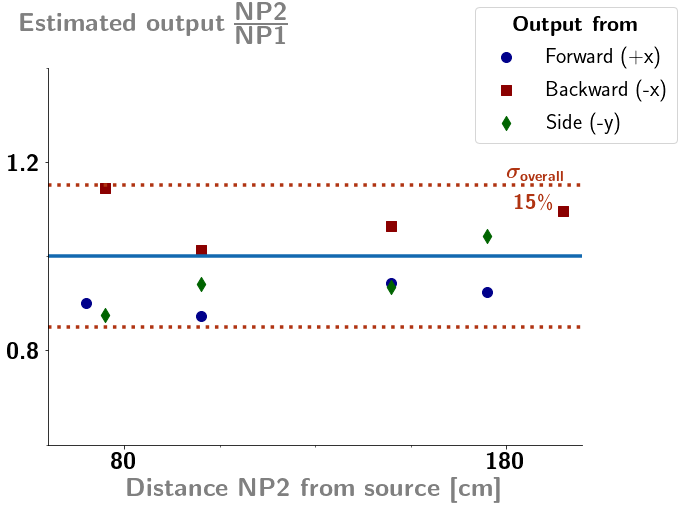

In [32]:
fs = 26
y_scale = 1
markersize = 100
xlims = [60, 200]

outputfolder = '/Users/hkromer/02_PhD/04_Publiations/08.Defense/Figures/'
figname = 'bonner_sphere_mapping'


fig = plt.figure(figsize=(8*1.2, 6*1.2))
ax1 = fig.add_subplot(1, 1, 1)
# x
minor_locator = AutoMinorLocator(4)
ax1.xaxis.set_minor_locator(minor_locator)
# y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)

# NP2 [north, south, east]
NP2 = [data_defense['NP2_north'].values, data_defense['NP2_south'].values, data_defense['NP2_east'].values]

# NP1
NP1 = [data_defense['NP1_north'].values, data_defense['NP1_south'].values, data_defense['NP1_east'].values]

# distances
distances = [data_defense['dist_north'].values, data_defense['dist_south'].values, data_defense['dist_east'].values]

# ratios NP2/NP1
ratios = []
for ii in range(len(NP2)):
    ratios.append(NP2[ii]/NP1[ii])

ii = 0
labels = ['Forward (+x)', 'Backward (-x)', 'Side (-y)']
markers = ['o', 's', 'd']
colors = ['darkblue', 'darkred', 'darkgreen']
for dist, ratio, label, marker, color in zip(distances, ratios, labels, markers, colors):
    ax1.scatter(dist, ratio, label=label, marker=marker, s=markersize, color=color)
    
    ii = ii + 1
ax1.plot(xlims, [1.0, 1.0], ls='-', color='#1269b0', linewidth=3.5)
ax1.plot(xlims, [1.15, 1.15], ls=':', color='#b03412', linewidth=3.5)
ax1.plot(xlims, [0.85, 0.85], ls=':', color='#b03412', linewidth=3.5)
ax1.text(180, 1.16 ,r"$\sigma_{overall}$", fontsize=fs-5, color='#b03412')
ax1.text(182, 1.10 ,r"$15$\%", fontsize=fs-5, color='#b03412')


plt.xlabel(r'\textbf{Distance NP2 from source [cm]}', color='gray', fontsize=fs)
plt.ylabel(r'\textbf{Estimated output} ' + r'$\frac{\textbf{NP2}}{\textbf{NP1}}$',  color='gray', rotation=0,fontsize=fs)



plt.ylim(0.6,1.4)
plt.xlim(xlims)
plt.xticks([80, 180])
plt.yticks([0.8, 1.2])

ax1.tick_params('x', colors='black', labelsize=fs-2)	
ax1.tick_params('y', colors='black', labelsize=fs-2)	

leg2 = plt.legend(fontsize=fs-4, loc=(0.8,0.8))
leg2.set_title(r"\textbf{Output from}", prop = {'size': fs-4})

ax1.yaxis.set_label_coords(0.2,1.05)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig(f'{outputfolder}/{figname}.pdf')
plt.savefig(f'{outputfolder}/{figname}.png', dpi=900)
plt.show()
plt.close()